In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Copy of seeds_dataset (2).csv')

# Display first 5 rows
data.head()


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)",Unnamed: 8,Unnamed: 9
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,NaN,NaN
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,NaN,NaN
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,NaN,NaN
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,NaN,NaN
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,NaN,NaN


In [3]:
# Dataset shape
print("Shape:", data.shape)

# Dataset info
data.info()

# Check missing values
print("\nMissing values:\n", data.isnull().sum())

Shape: (210, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (1, 2, 3)          210 non-null    int64  
 8   Unnamed: 8               2 non-null      object 
 9   Unnamed: 9               1 non-null      object 
dtypes: float64(7), int64(1), object(2)
memory usage: 16.5+ KB

Missing values:
 Area                         0
Perimeter                    0
Compactness                  0
Length of kernel             0
Width of kernel          

In [5]:
data = data.drop(columns=['Unnamed: 8', 'Unnamed: 9'])
data.columns = [
    'Area', 'Perimeter', 'Compactness',
    'Kernel_Length', 'Kernel_Width',
    'Asymmetry', 'Groove_Length', 'Class'
]

data.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry,Groove_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
# Encode class labels
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

data.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry,Groove_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [7]:
X = data.drop('Class', axis=1)
y = data['Class']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (210, 7)
Target shape: (210,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 168
Testing samples: 42


In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf_model.predict(X_test)

In [12]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9047619047619048

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.93      1.00      0.97        14
           2       0.82      1.00      0.90        14

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42



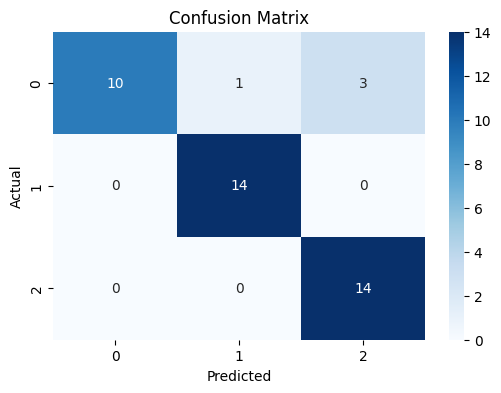

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=data.drop('Class', axis=1).columns
).sort_values(ascending=False)

feature_importance

,0
Area,0.208259
Perimeter,0.201167
Groove_Length,0.195626
Kernel_Width,0.155140
Kernel_Length,0.140489
Asymmetry,0.066531
Compactness,0.032787


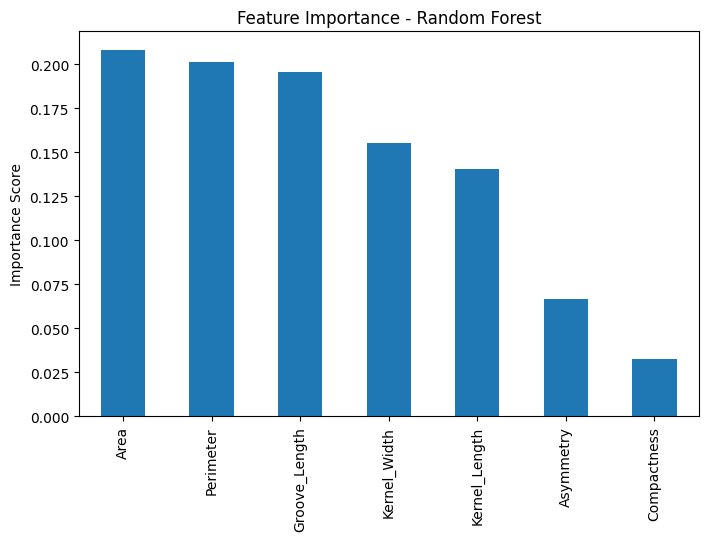

In [15]:
plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.show()

In [17]:
import pickle

with open('random_forest_seeds_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved successfully!")

Model saved successfully!
